In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform

include("./utils.jl")

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 50
num_features = 2
probs = [0.5, 0.2, 0.3]

X, y = generate_imbalanced_data(num_rows, num_features; probs, type="DictColTable")

Xm = Tables.matrix(X)

50×2 Matrix{Float64}:
 0.833508   0.300133
 0.164416   0.476301
 0.664149   0.687651
 0.65965    0.810625
 0.993018   0.482807
 0.470673   0.638787
 0.0100566  0.122744
 0.384158   0.150491
 0.173707   0.48879
 0.216342   0.309983
 ⋮          
 0.309113   0.118054
 0.823171   0.843813
 0.651241   0.35748
 0.624286   0.912442
 0.548404   0.753232
 0.228375   0.920907
 0.484025   0.476064
 0.731832   0.437231
 0.969279   0.250196

### 2. Apply ROSE

In [3]:
mach = machine(ROSE(s=0.03, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=rng))
Xover, yover = transform(mach, X, y)

((Column1 = [0.8335083632523961, 0.16441612139358286, 0.6641487465350979, 0.6596495088538521, 0.9930182607007071, 0.470672599052367, 0.010056574003405205, 0.3841579612901601, 0.17370712062047788, 0.21634245388191475  …  0.47280487793763454, 0.43181137985661455, 0.16740340122487393, 0.9730433923430973, 0.7385527489792806, 0.754663770117653, 0.17298402640097882, 0.6557296469177849, 0.55354107627016, 0.5390984338449165], Column2 = [0.3001329507873365, 0.4763008673789113, 0.687650616750942, 0.8106254889699178, 0.48280709601014593, 0.6387865549032593, 0.12274366893776678, 0.15049120085966516, 0.48879034463509086, 0.30998300657952105  …  0.6397368013931762, 0.01705835304076809, 0.47708732073745946, 0.35123838901375104, 0.858485971921939, 0.8258850250826383, 0.4826676286984624, 0.9490351967269136, 0.7557031302986279, 0.3547256401505067]), CategoricalValue{Int64, UInt32}[2, 1, 1, 0, 0, 1, 0, 2, 0, 2  …  1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

### 3. Plot the Results

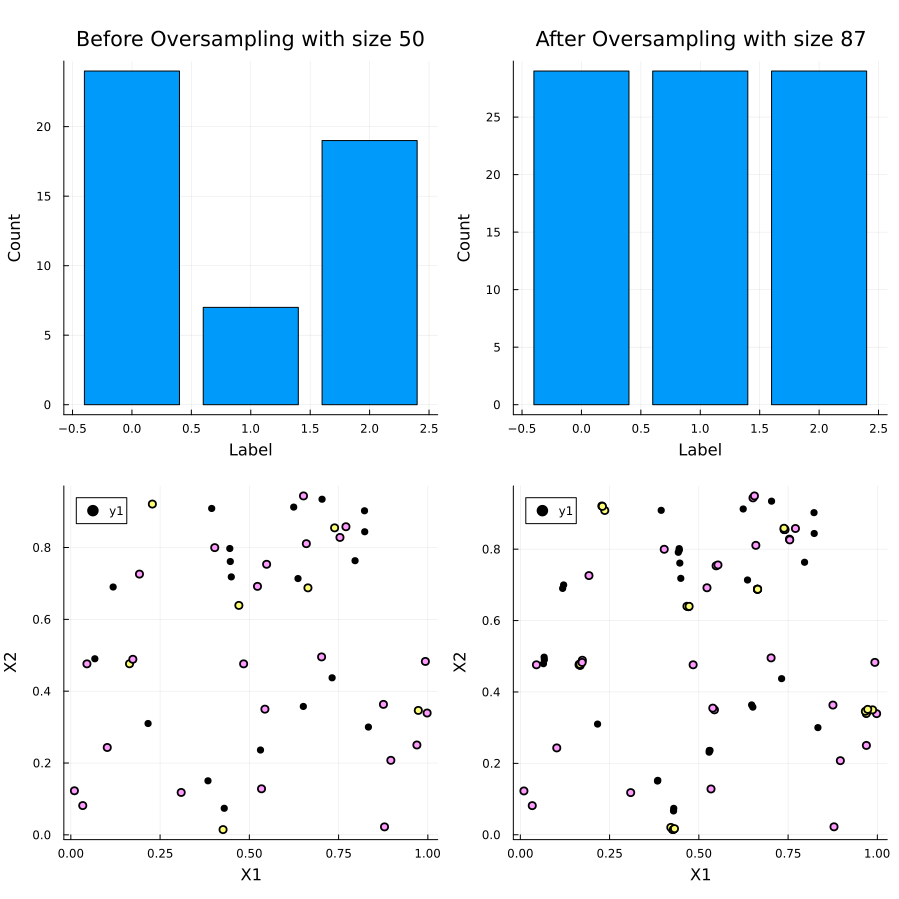

In [4]:
plot_data(y, yover, X, Xover)

In [4]:
using MLJBase
using Imbalance
using MLUtils
using Random
using StableRNGs: StableRNG

X, y = MLJBase.@load_iris
# Take an imbalanced subset of the data
rand_inds = rand(StableRNG(10), 1:150, 30)
X, y = getobs(X, rand_inds), y[rand_inds]
group_counts(y)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 3 entries:
  "virginica"  => 5
  "versicolor" => 15
  "setosa"     => 10

In [5]:
R = ROSE(s=0.3, ratios=Dict("setosa"=>0.9, "versicolor"=> 1.0, "virginica"=>0.7), rng=42)
mach = machine(R)
Xover, yover = transform(mach, X, y)
group_counts(yover)

Dict{CategoricalArrays.CategoricalValue{String, UInt32}, Int64} with 3 entries:
  "virginica"  => 10
  "versicolor" => 15
  "setosa"     => 14